### Task 1
### Author : Manisha Das
### Objective :

To estimate the percetage of marks, obtained by a student who studies for 9.25 hours/day, given the data on marks and hours



In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

### Import the Dataset

In [2]:


df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv',sep=',')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualize the Entire Dataset

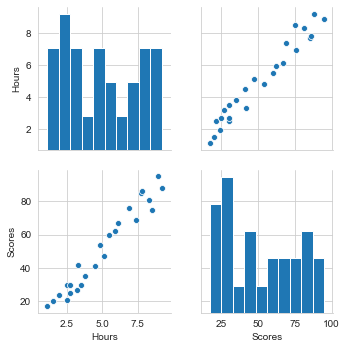

In [4]:
sns.pairplot(df)

From the scatter plot, we can see that there is a positive relationship between Scores and Hours. This implies that if a student studies for more hours, they will obtain a higher score

### Define the Dependent and Independent Variables

In [5]:
X=df.loc[:,df.columns!="Scores"]
Y=df['Scores']

In [6]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [7]:
Y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### Test Train Split

20 % of the entire dataset is used for testing purpose

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

### Estimate the Model Using the Training Dataset

In [10]:
# Adding constant to estimate the linear model of the form Y = a + bX + error_terms

X_train=sm.add_constant(X_train)

In [11]:
model = sm.OLS(Y_train,X_train)

In [12]:
result = model.fit()

In [13]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           2.79e-13
Time:                        10:53:00   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.5

### Visual Representation of the Fitted Model With Respect to the Training Dataset

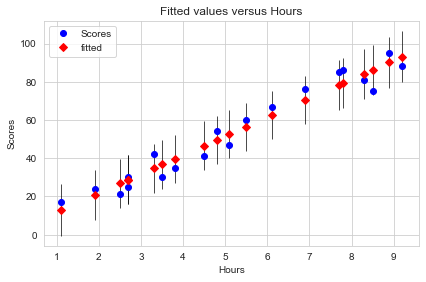

In [16]:
fig = sm.graphics.plot_fit(result, "Hours")
fig.tight_layout(pad=1.0)

### Prediction using the Test Dataset

In [18]:
X_test = sm.add_constant(X_test)
Y_hat = result.predict(X_test)
Y_hat



5     16.884145
2     33.732261
19    75.357018
16    26.794801
11    60.491033
dtype: float64

### Checking the Performance of the Model With Respect to the Test Dataset

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(Y_test,Y_hat)

21.59876930721748

In [20]:
r2_score(Y_test,Y_hat)

0.9454906892105354

Here we see that the r^2 value is quite high. So we conclude that the model is a good fit.

### Estimate the Percentage of Marks Obtained by a Student Who Studies for 9.25 Hours/Day

In [21]:
# Create a dataframe to estimate the percentage of marks obtained by a student who studies for 9.25 hrs/day

X_new = pd.DataFrame({'const':[1],'Hours':[9.25]})

In [22]:
X_new

,const,Hours
0,1,9.25


In [23]:
result.predict(X_new)

0    93.691732
dtype: float64

The Estimated Percentage of Score, Obtained by the student is 94 (approximately)